#  Complete Resource 

https://www.perplexity.ai/search/hi-i-want-to-do-my-homework-re-1BrAAw7OTLmOltaRwgdHMg#20 

In [42]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment4.ipynb")

# Clustering in Practice and K-Means Clustering

Please complete the following assignment. Run all cells and submit your completed notebook through Gradescope.

- Clustering is a fundamental unsupervised learning technique used to group similar data points based on their features. It helps in discovering patterns and structures within datasets without predefined labels.

- The k-means algorithm aims to partition a dataset into k clusters, assigning each data point to the cluster whose centroid is closest to that point.

**In this assignment, the aim is to check and reinforce your understanding  of clustering, specifically K-Means clustering.**


**Note:** Do not change any of the parameters given in the starter code (e.g., random_state=42, number of samples, centers, or cluster standard deviation).  

These fixed values ensure your results are reproducible and match the expected test cases.  

<!-- BEGIN QUESTION -->

#### 1. Which of the following best describes the objective function minimized in k-means clustering?

A) The variance between cluster centroids.

B) The sum of squared distances between all pairs of data points.

C) The sum of squared distances between each point and its assigned cluster centroid.

D) The determinant of the covariance matrix of the clusters.

C) The sum of squared distances between each point and its assigned cluster centroid.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 2. Which of the following is a known limitation of k-means?

A) It cannot be implemented in higher dimensions.

B) It performs poorly when clusters have non-spherical shapes.

C) It can only work with datasets having fewer than 1,000 points.

D) It guarantees the global optimum clustering solution.

B) It performs poorly when clusters have non-spherical shapes.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 3. What is the main advantage of using the k-means++ initialization method over the standard k-means initialization?

A) It selects initial centroids that are maximally distant from each other, ensuring convergence to the global optimum.

B) It reduces the computational complexity of k-means from quadratic to linear time with respect to the number of data points.

C) It allows k-means clustering to automatically determine the optimal number of clusters without prior specification.

D) It probabilistically selects initial centroids based on data density, leading to faster convergence and improved clustering results.

D) It probabilistically selects initial centroids based on data density, leading to faster convergence and improved clustering results.

<!-- END QUESTION -->

#### 4-a. Clustering on Isotropic Gaussian Distributed Data

- A synthetic dataset has been generated using sklearn’s `make_blobs`.  
- Apply **K-Means clustering** with `k = 3`.  
- Plot the clustered data and highlight the cluster centers with a distinct marker.  
- Return:  
  - The cluster centers  
  - The predicted cluster labels  
  - The Within-Cluster Sum of Squares (WCSS)  

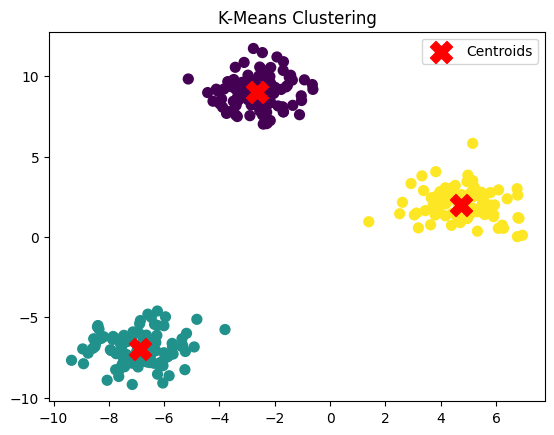

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def ans4a():
    X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
    
    # 1. Create and fit KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    # 2. Get cluster centers
    centers = kmeans.cluster_centers_
    
    # 3. Get inertia (WCSS)
    inertia = kmeans.inertia_
    
    # 4. Plot
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X', label='Centroids')
    plt.legend()
    plt.title("K-Means Clustering")
    plt.show()
    
    return centers, y_kmeans, inertia, X

# Run the function
centers, y_kmeans, inertia, X = ans4a()


In [3]:
grader.check("q4a")

q4a results: All test cases passed!

<!-- BEGIN QUESTION -->

#### 4-b. Plot the original data points and the clustered data points
 
- Plot the clustered data and highlight the cluster centers with a distinct marker.  

A) Plot Original Data Points with True Labels


Text(0, 0.5, 'Feature 2')

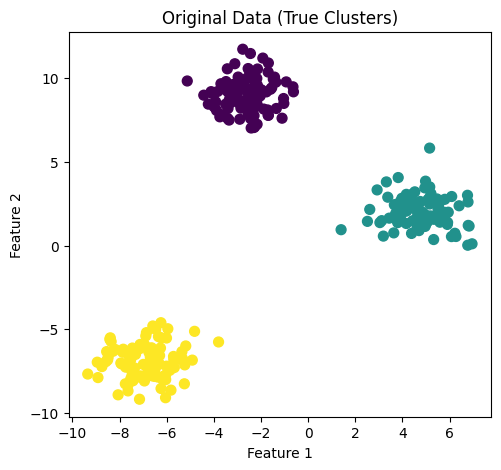

In [5]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.title("Original Data (True Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


B) Plot Clustered Data Points and Cluster Centers

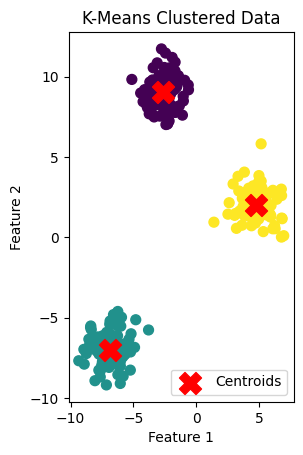

In [6]:
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X', label='Centroids')
plt.title("K-Means Clustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()


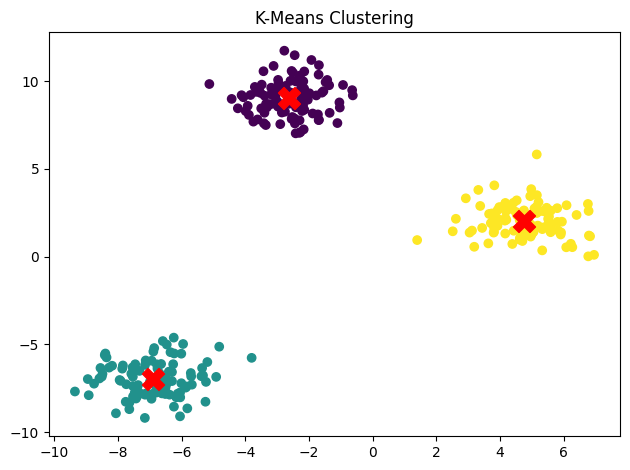

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X')
plt.title("K-Means Clustering")
plt.tight_layout()
plt.show()


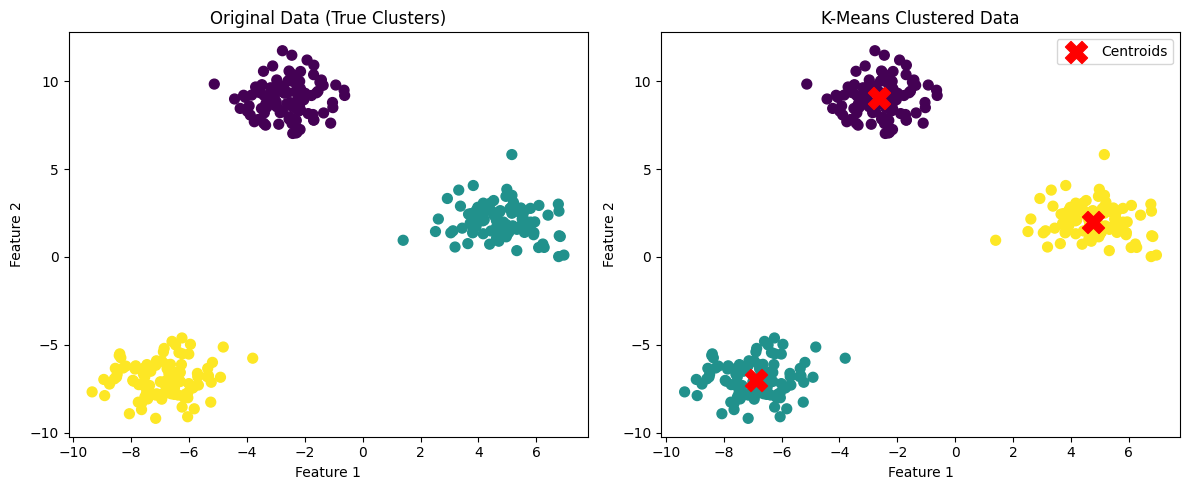

In [11]:
plt.figure(figsize=(12, 5))

# First subplot: True labels
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.title("Original Data (True Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Second subplot: K-means result
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X', label='Centroids')
plt.title("K-Means Clustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Layout and show
plt.tight_layout()
plt.show()



In [13]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_kmeans)
# Use the Hungarian algorithm to match labels
row_ind, col_ind = linear_sum_assignment(-cm)
# Create a label mapping from predicted to true label
label_map = dict(zip(col_ind, row_ind))
# Remap predicted labels
y_kmeans_aligned = np.array([label_map[label] for label in y_kmeans])


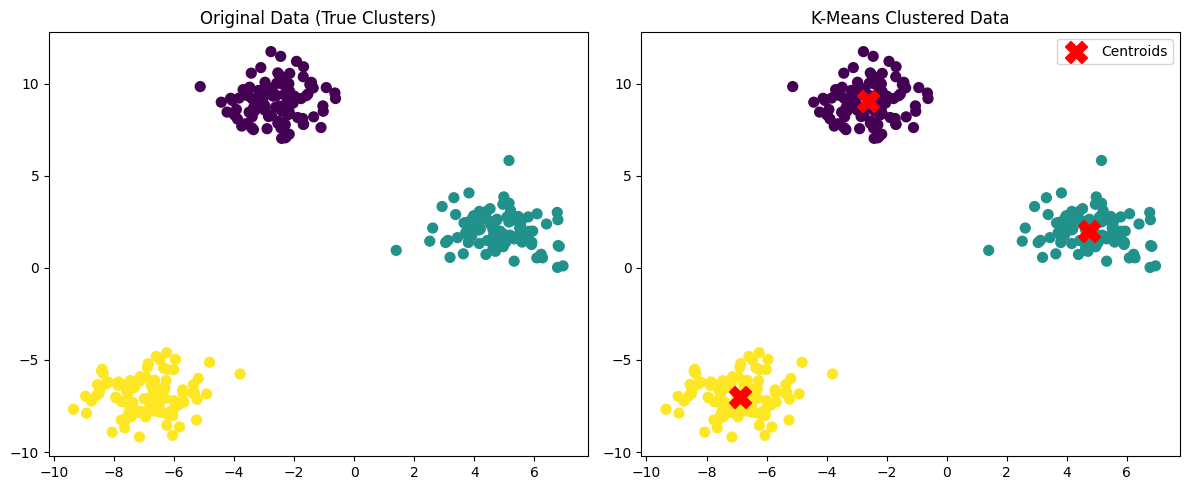

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.title("Original Data (True Clusters)")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_aligned, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X', label='Centroids')
plt.title("K-Means Clustered Data")
plt.legend()

plt.tight_layout()
plt.show()


<!-- END QUESTION -->

#### 5a. Clustering on funky-looking anisotropic data

- A synthetic dataset has been generated using sklearn’s `make_moons`.  
- Apply **K-Means clustering** with `k = 2`.  
- Return:  
  - The predicted cluster labels  
  - The true labels  
  - The Adjusted Rand Index (ARI)
  - The original data points
  - The true labels
  - The cluster centers

In [15]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

def ans5a():
    # Generate noisy moons dataset (anisotropic)
    X, y_true = make_moons(n_samples=300, noise=0.15, random_state=42)
    
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    # Get cluster centers
    centers_ = kmeans.cluster_centers_
    
    # Compute Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(y_true, y_kmeans)
    
    # Return expected values
    return y_kmeans, y_true, ari, X, y_true, centers_
    
y_kmeans, y_true, ari, X, y_true, centers = ans5a()


In [16]:
grader.check("q5a")

q5a results: All test cases passed!

<!-- BEGIN QUESTION -->

#### 5-b. Plot the clustered data

- Make two plots:  
  - Plot the original data points.
  - Plot the clustered data and highlight the cluster centers with a distinct marker.  


Text(0, 0.5, 'Feature 2')

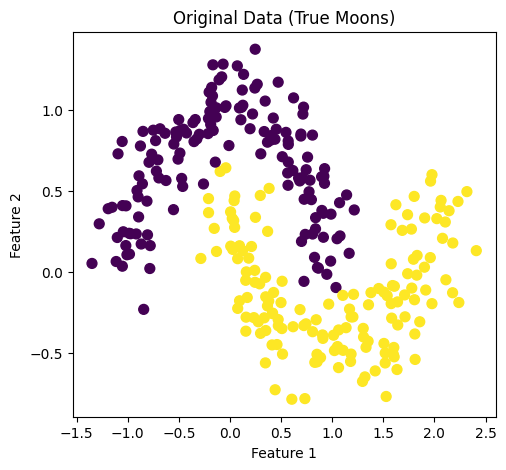

In [ ]:
# Plot the original, ground truth data points.

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.title("Original Data (True Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

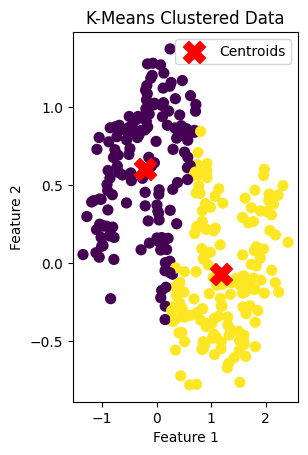

In [18]:
# Now plot the k-means clustering results with the cluster centers highlighted.
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X', label='Centroids')
plt.title("K-Means Clustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()


<!-- END QUESTION -->

#### 6-a. Comparing K-Means Initialization Methods

- In this question, you will **compare** K-Means clustering using **random initialization** and **k-means++ initialization** on synthetic data generated with `make_blobs`.  
- Apply K-Means with the same number of clusters for both initialization methods.
- Compare the two approaches by reporting:  
  - The number of iterations until convergence  
  - The WCSS (within-cluster sum of squares)    
- Return the following values:
  - `n_iter_random`, `n_iter_kpp`, `wcss_random`, `wcss_kpp`

In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def ans6a():
    # Data
    X, y_true = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=42)

    # KMeans with random init
    kmeans_random = KMeans(n_clusters=5, init='random', random_state=42)
    kmeans_random.fit(X)
    n_iter_random = kmeans_random.n_iter_
    wcss_random = kmeans_random.inertia_

    # KMeans with k-means++ (default)
    kmeans_kpp = KMeans(n_clusters=5, init='k-means++', random_state=42)
    kmeans_kpp.fit(X)
    n_iter_kpp = kmeans_kpp.n_iter_
    wcss_kpp = kmeans_kpp.inertia_
    print(f"{n_iter_random}  ,  {n_iter_kpp} ,  {wcss_random} , {wcss_kpp}")

    return n_iter_random, n_iter_kpp, wcss_random, wcss_kpp

# Run function to get results
n_iter_random, n_iter_kpp, wcss_random, wcss_kpp = ans6a()


6  ,  2 ,  698.7711305676505 , 698.7711305676505


In [20]:
grader.check("q6a")

q6a results: All test cases passed!

<!-- BEGIN QUESTION -->

#### 6-b. Briefly explain how the choice of initialization (random vs. k-means++) influences the convergence speed and the quality of the clustering results.  

As we can observe from above example that Using k-means++ initialization leads to faster convergence (2 iterations for k-means++ initialization vs. 6 iterations for random initialization) and achieves the same clustering quality (the WCSS is identical in both cases: 698.77).

    This shows that k-means++ efficiently finds good starting points, letting the algorithm reach the optimal clustering more quickly and reliably, while random initialization may take longer and sometimes end with worse results. 

<!-- END QUESTION -->

#### 7-a. Determining Optimal K Using the Elbow Method  

- In this question, you will explore how to select the optimal number of clusters using the **Elbow Method**.  
- Run **K-Means clustering** on a synthetic dataset for different values of `k` (from 1 to 10), using the **k-means++ initialization** strategy.  
- For each `k`:  
  - Record the Within-Cluster Sum of Squares (WCSS).  
  - Record the Rand Index score relative to the true labels.  
- Based on the results, determine the **optimal `k` value**.  
- Return the following values (in this order):  
  - `optimal_k`: the optimal number of clusters, 
  - `rand_scores_list`: the list of Rand Index scores, 
  - `wcss_list`: the list of WCSS values, 
  - `k_values`: the list of k values, 
  - `wcss_list`: the list of WCSS values 

In [37]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

def ans7a():
    # Synthetic dataset
    X, y_true = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=42)
    
    wcss_list = []
    rand_scores_list = []
    k_values = list(range(1, 11))

    # Loop through k values
    for k in k_values:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        y_kmeans = kmeans.fit_predict(X)
        # print(y_kmeans)
        # print(y_true )
        wcss_list.append(kmeans.inertia_)
        # For k=1 we can't compute Rand Index (only one cluster), so use np.nan
        score = adjusted_rand_score(y_true, y_kmeans) if k > 1 else np.nan
        rand_scores_list.append(score)
    print(wcss_list)
    
    # Find optimal k by Elbow (typically where WCSS drop slows; for this data, usually k=5)
    # visually inspect wcss_list for elbow
    optimal_k = 4

    return optimal_k, rand_scores_list, wcss_list, k_values, wcss_list

optimal_k, rand_scores, wcss, k_values, wcss_list = ans7a()


[57466.39771404686, 31751.069803539947, 6145.94331233505, 1891.9661633713608, 698.7711305676505, 649.1801212844956, 609.4828125578763, 547.7018230086563, 503.45215012545765, 472.1148464624987]


In [34]:
grader.check("q7a")

q7a results: All test cases passed!

<!-- BEGIN QUESTION -->

#### 7-b. Elbow Curve

- Create a visualization of the **Elbow Curve** (WCSS vs. k). 

[57466.39771404686, 31751.06980353994, 6145.94331233505, 1891.9661633713606, 698.7711305676505, 649.1801212844956, 609.4828125578763, 547.7018230086563, 503.45215012545765, 472.1148464624987]


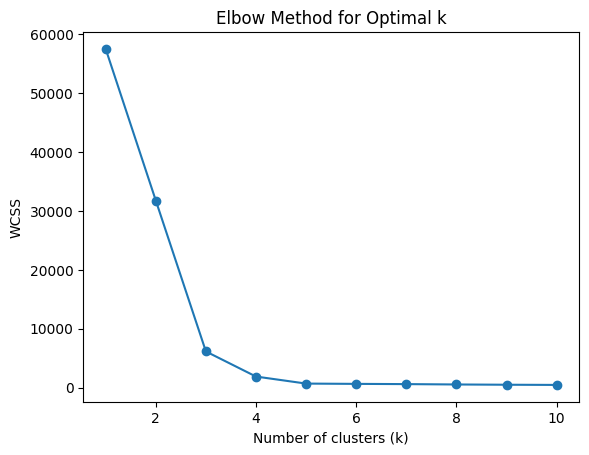

In [38]:
X, y_true = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=42)
wcss_list = []

# Loop through k values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    wcss_list.append(kmeans.inertia_)

print(wcss_list)
plt.plot(k_values, wcss_list, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

### Can use logrithic y axis for better visualization

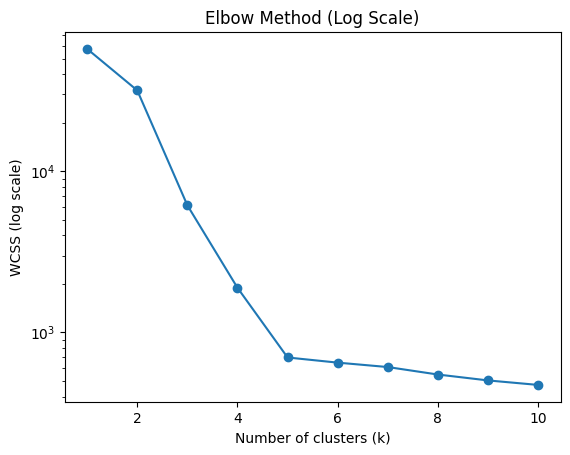

In [39]:
plt.plot(k_values, wcss_list, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (log scale)')
plt.yscale('log')
plt.title('Elbow Method (Log Scale)')
plt.show()


<!-- END QUESTION -->

